Import all the functions and classes

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


convert an array of values into a dataset matrix

In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return numpy.array(dataX), numpy.array(dataY)

fix random seed for reproducibility

In [3]:
numpy.random.seed(7)

Load the dataset

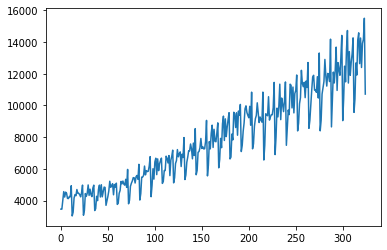

In [5]:
dataframe = read_csv('datasets_623780_1120494_Alcohol_Sales.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataframe)
plt.show()

Normalize the data

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Split the dataset into train and test sets

In [8]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

reshape the train and test datasets into X = t and Y = t + 1

In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

reshape into input [samples, time steps, features]

In [10]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Create and define LSTM model

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0399
Epoch 2/100
 - 1s - loss: 0.0152
Epoch 3/100
 - 1s - loss: 0.0129
Epoch 4/100
 - 1s - loss: 0.0110
Epoch 5/100
 - 1s - loss: 0.0095
Epoch 6/100
 - 1s - loss: 0.0080
Epoch 7/100
 - 1s - loss: 0.0070
Epoch 8/100
 - 1s - loss: 0.0064
Epoch 9/100
 - 1s - loss: 0.0060
Epoch 10/100
 - 1s - loss: 0.0058
Epoch 11/100
 - 1s - loss: 0.0057
Epoch 12/100
 - 1s - loss: 0.0056
Epoch 13/100
 - 2s - loss: 0.0055
Epoch 14/100
 - 1s - loss: 0.0057
Epoch 15/100
 - 2s - loss: 0.0057
Epoch 16/100
 - 2s - loss: 0.0056
Epoch 17/100
 - 2s - loss: 0.0056
Epoch 18/100
 - 2s - loss: 0.0056
Epoch 19/100
 - 2s - loss: 0.0055
Epoch 20/100
 - 1s - loss: 0.0054
Epoch 21/100
 - 1s - loss: 0.0056
Epoch 22/100
 - 1s - loss: 0.0055
Epoch 23/100
 - 1s - loss: 0.0055
Epoch 24/100
 - 2s - loss: 0.0057
Epoch 25/100
 - 1s - loss: 0.0056
Epoch 26/100
 - 1s - loss: 0.0057
Epoch 27/100
 - 2s - loss: 0.0055
Epoch 28/100
 - 2s - loss: 0.0056
Epoch 29/100
 - 1s - loss: 0.0056
Epoch 30/100
 - 1s - lo

make prediction

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

rescale predicted values

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

calculate root mean squared error

In [15]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 910.16 RMSE
Test Score: 1829.58 RMSE


plot baseline and predictions

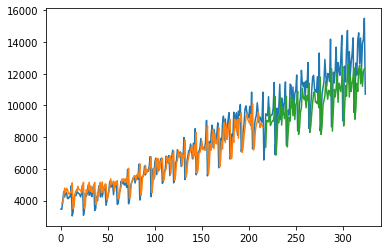

In [16]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()